## 単回帰分析

1つの説明変数から目的変数を予測

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

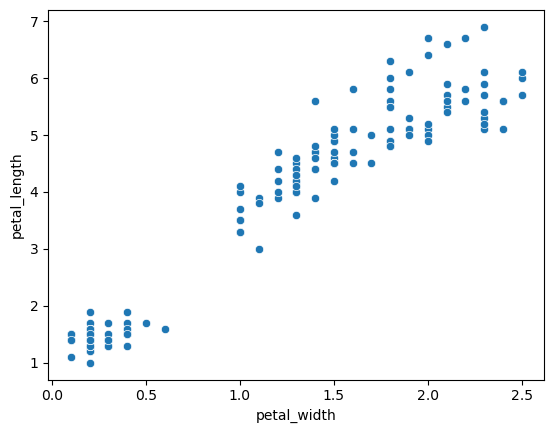

In [2]:
# 散布図
sns.scatterplot(x=df.petal_width, y=df.petal_length)

<img src='slides/5_4.png'>

In [3]:
# モデルの学習に用いる教師データの用意
# - 説明変数 X は DataFrame で渡す必要
#   X = pd.DataFrame(df.petal_width)
# - 以下と同じ
X = df[['petal_width']]
Y = df.petal_length

<hr>

`df['petal_width']` と `df[['petal_width']]` は異なる。
- それぞれのデータ型は `type(df['petal_width'])`, `type(df[['petal_width']])` で調べられる。

<img src='slides/5_8.png'>
<hr>

In [4]:
# 線形単回帰モデルの作成
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# モデルの学習
model.fit(X, Y)

LinearRegression()

In [5]:
# coefficient: 係数
# intercept  : 切片
print('coefficient={:.3f}, intercept={:.3f}'.format(model.coef_[0], model.intercept_))

coefficient=2.230, intercept=1.084


- intercept: β_0
- coefficient: β_1

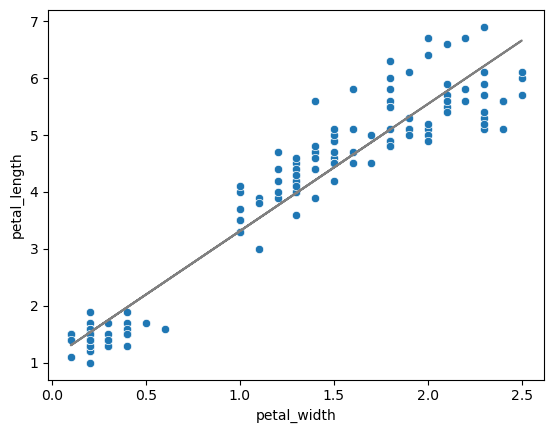

In [6]:
# 散布図に回帰直線を重ねて描画
sns.scatterplot(x=df.petal_width, y=df.petal_length)

# モデルによる予測
Y_predict = model.predict(X)

# 回帰直線を描画
#X = df[['petal_width']]
plt.plot(X, Y_predict, color='gray')
#plt.plot(X.petal_width.to_numpy(), Y_predict, color='gray')

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

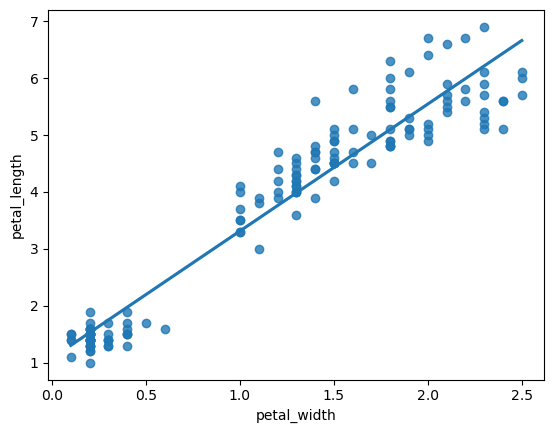

In [7]:
# regplot は散布図に回帰直線を重ねて描画
sns.regplot(x=df.petal_width, y=df.petal_length, ci=None)

## モデルの評価

- 平均二乗誤差
- 決定係数

<img src='slides/5_9.png'>

In [8]:
# 平均二乗誤差
from sklearn.metrics import mean_squared_error
print('MSE={:.3f}'.format(mean_squared_error(Y, Y_predict)))

MSE=0.226


<img src='slides/5_11.png'>

In [9]:
# 決定係数
from sklearn.metrics import r2_score
print('R^2={:.3f}'.format(r2_score(Y, Y_predict)))

R^2=0.927


In [10]:
# 決定係数
print('R^2={:.3f}'.format(model.score(X, Y)))

R^2=0.927
